# 라이브러리 불러오기

# Null 값 확인
1. format 형식
2. msno 사용

# Target의 분포 경향 확인

# EDA - Pclass : groupby, crosstab, pandas plot(평균생존률)
# EDA - Sex : 성별 별로 생존 수와 생존률, crosstab, factorplot
# EDA - Age : 최연장자, 최연소자, 평균, kdeplot

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
for i in df_train.columns :
    bottom = len(df_train[i])
    top = df_train[i].isnull().sum()
    ratio = 100*(top/bottom)
    print('column : {:>13} Percent of NaN Value : {:.2f}%'.format(i,ratio))

column :   PassengerId Percent of NaN Value : 0.00%
column :      Survived Percent of NaN Value : 0.00%
column :        Pclass Percent of NaN Value : 0.00%
column :          Name Percent of NaN Value : 0.00%
column :           Sex Percent of NaN Value : 0.00%
column :           Age Percent of NaN Value : 19.87%
column :         SibSp Percent of NaN Value : 0.00%
column :         Parch Percent of NaN Value : 0.00%
column :        Ticket Percent of NaN Value : 0.00%
column :          Fare Percent of NaN Value : 0.00%
column :         Cabin Percent of NaN Value : 77.10%
column :      Embarked Percent of NaN Value : 0.22%


In [21]:
for i in df_test.columns :
    bottom = len(df_train[i])
    top = df_test[i].isnull().sum()
    ratio = 100*(top/bottom)
    print('column : {:>13} Percent of NaN Value : {:.2f}%'.format(i,ratio))

column :   PassengerId Percent of NaN Value : 0.00%
column :        Pclass Percent of NaN Value : 0.00%
column :          Name Percent of NaN Value : 0.00%
column :           Sex Percent of NaN Value : 0.00%
column :           Age Percent of NaN Value : 9.65%
column :         SibSp Percent of NaN Value : 0.00%
column :         Parch Percent of NaN Value : 0.00%
column :        Ticket Percent of NaN Value : 0.00%
column :          Fare Percent of NaN Value : 0.11%
column :         Cabin Percent of NaN Value : 36.70%
column :      Embarked Percent of NaN Value : 0.00%


<AxesSubplot:>

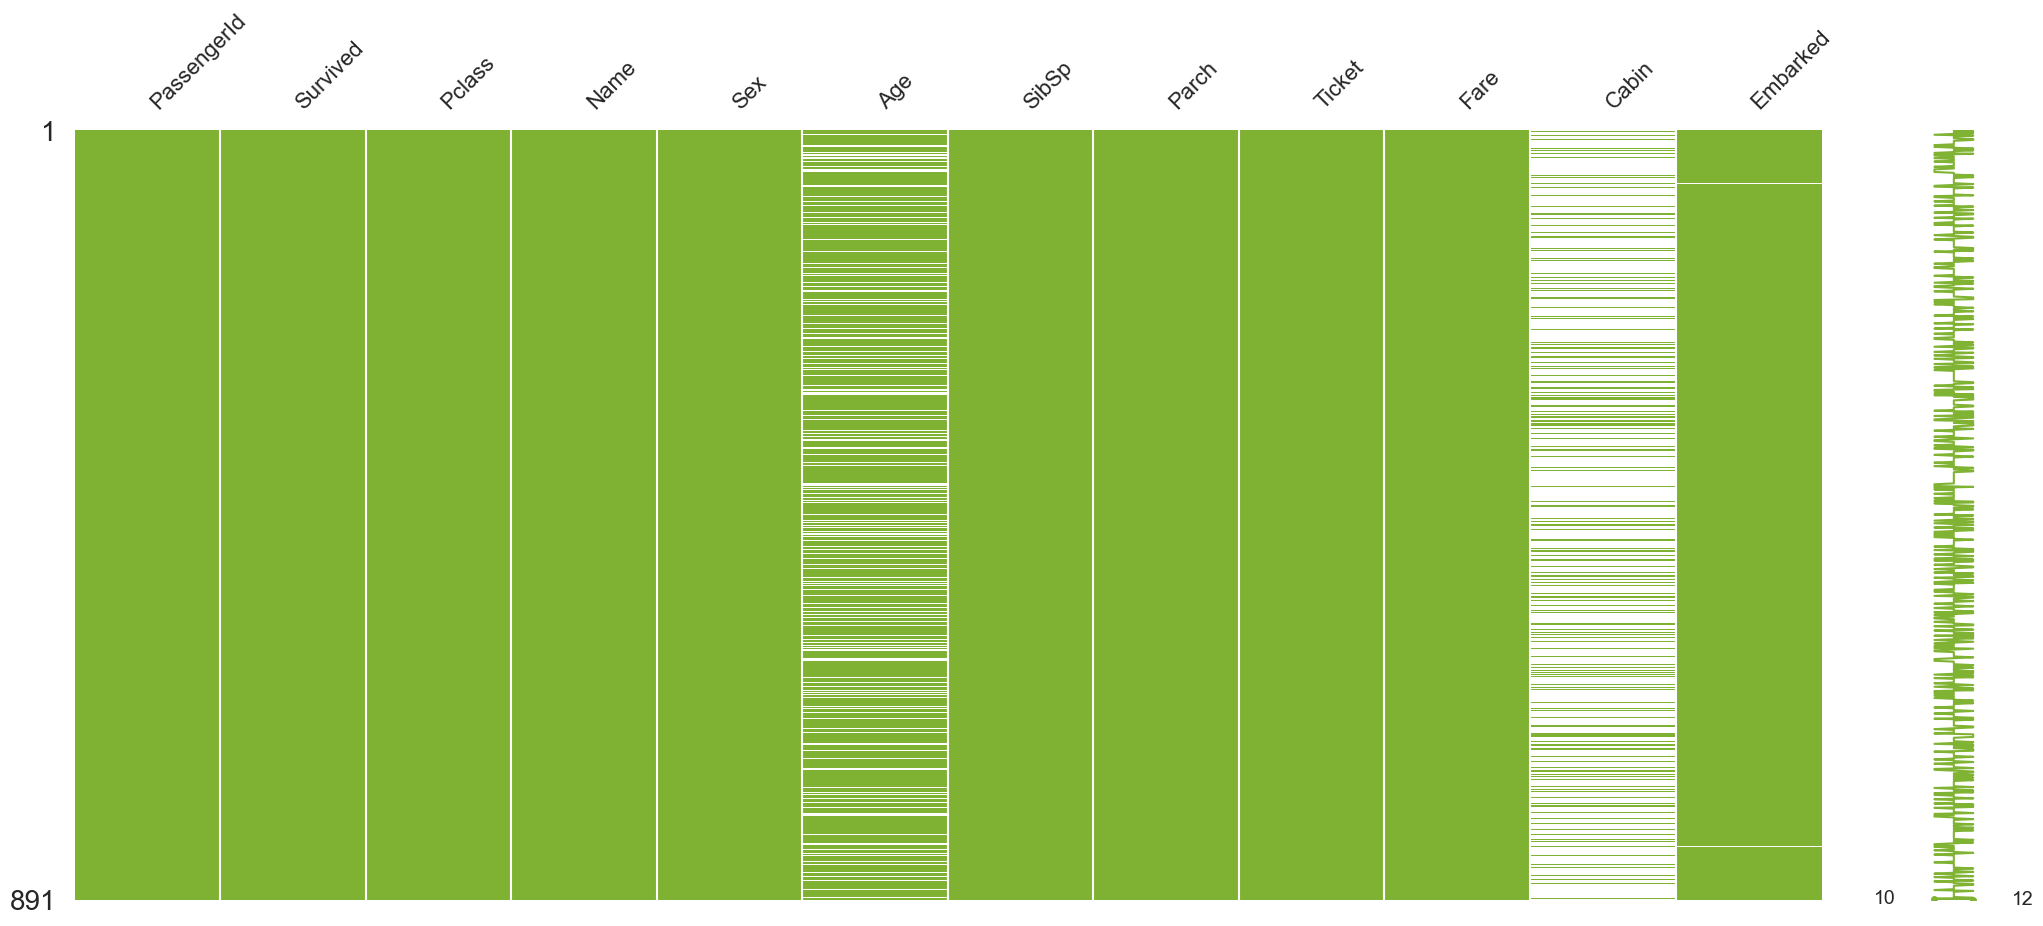

In [33]:
msno.matrix(df=df_train,color=(0.5,0.7,0.2))

<AxesSubplot:>

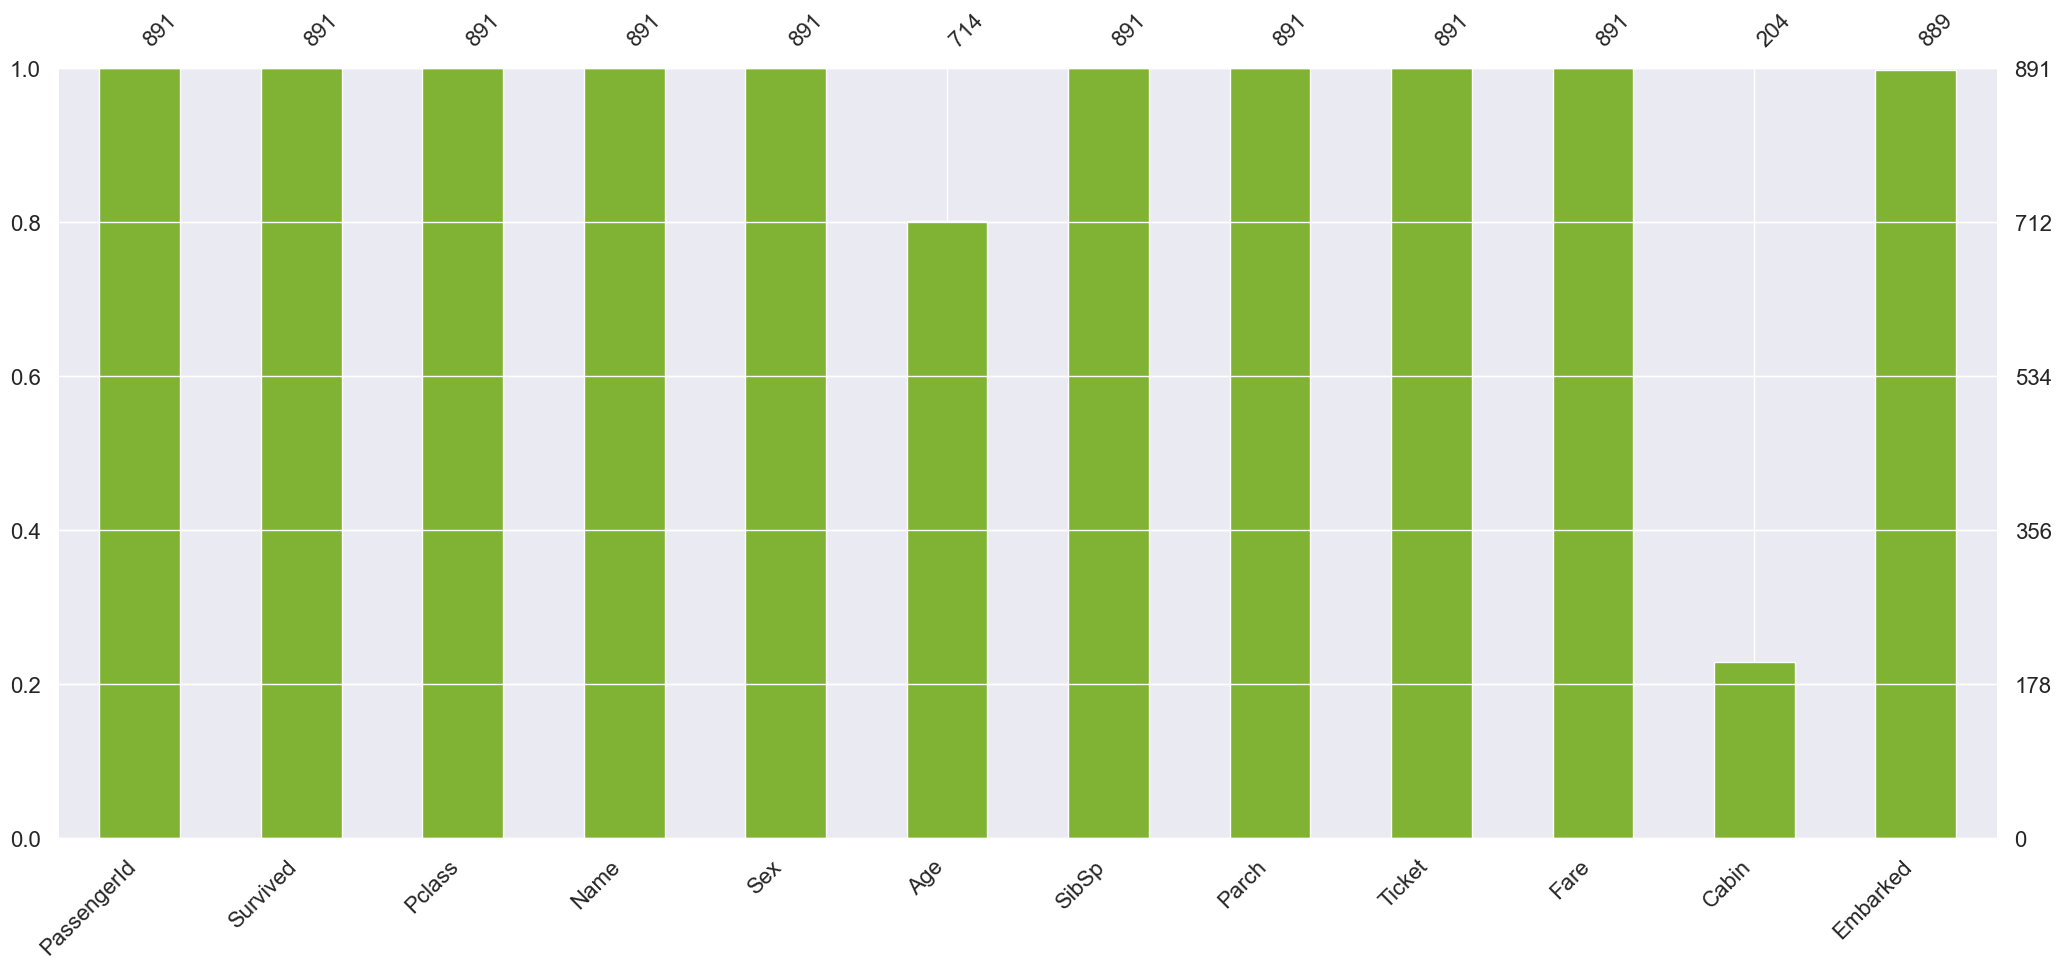

In [32]:
msno.bar(df=df_train,color=(0.5,0.7,0.2))

0    549
1    342
Name: Survived, dtype: int64


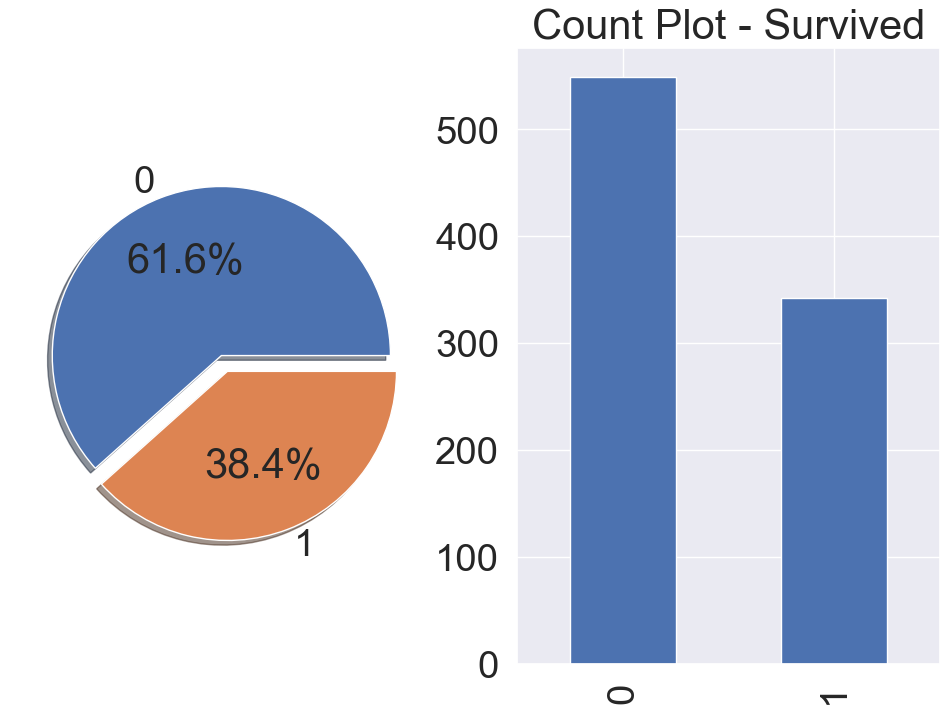

In [44]:
f,ax = plt.subplots(1,2,figsize=(12,8))
print(df_train['Survived'].value_counts())
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],ax=ax[0],shadow=True,autopct='%1.1f%%')
ax[0].set_ylabel('')

df_train['Survived'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('Count Plot - Survived')

plt.show()

In [60]:
# print(df_train.groupby(by='Pclass',as_index=True)[['Survived']].count()) # [['Pclass','Survived']]
print(df_train['Pclass'].value_counts())
print(df_train.groupby(by='Pclass',as_index=True)[['Survived']].sum())

3    491
1    216
2    184
Name: Pclass, dtype: int64
        Survived
Pclass          
1            136
2             87
3            119


In [66]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


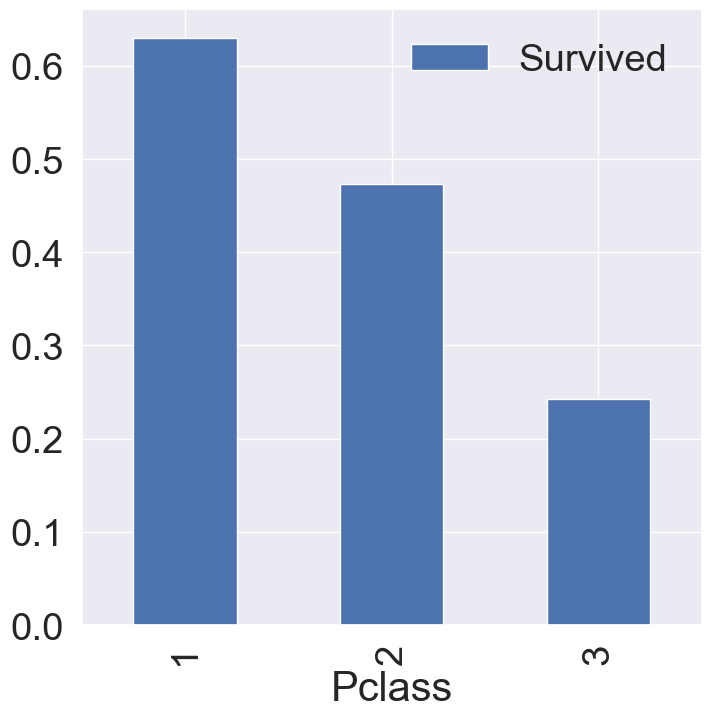

In [76]:
f,ax = plt.subplots(1,1,figsize=(8,8))
df_train[['Pclass','Survived']].groupby('Pclass',as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)
plt.show()

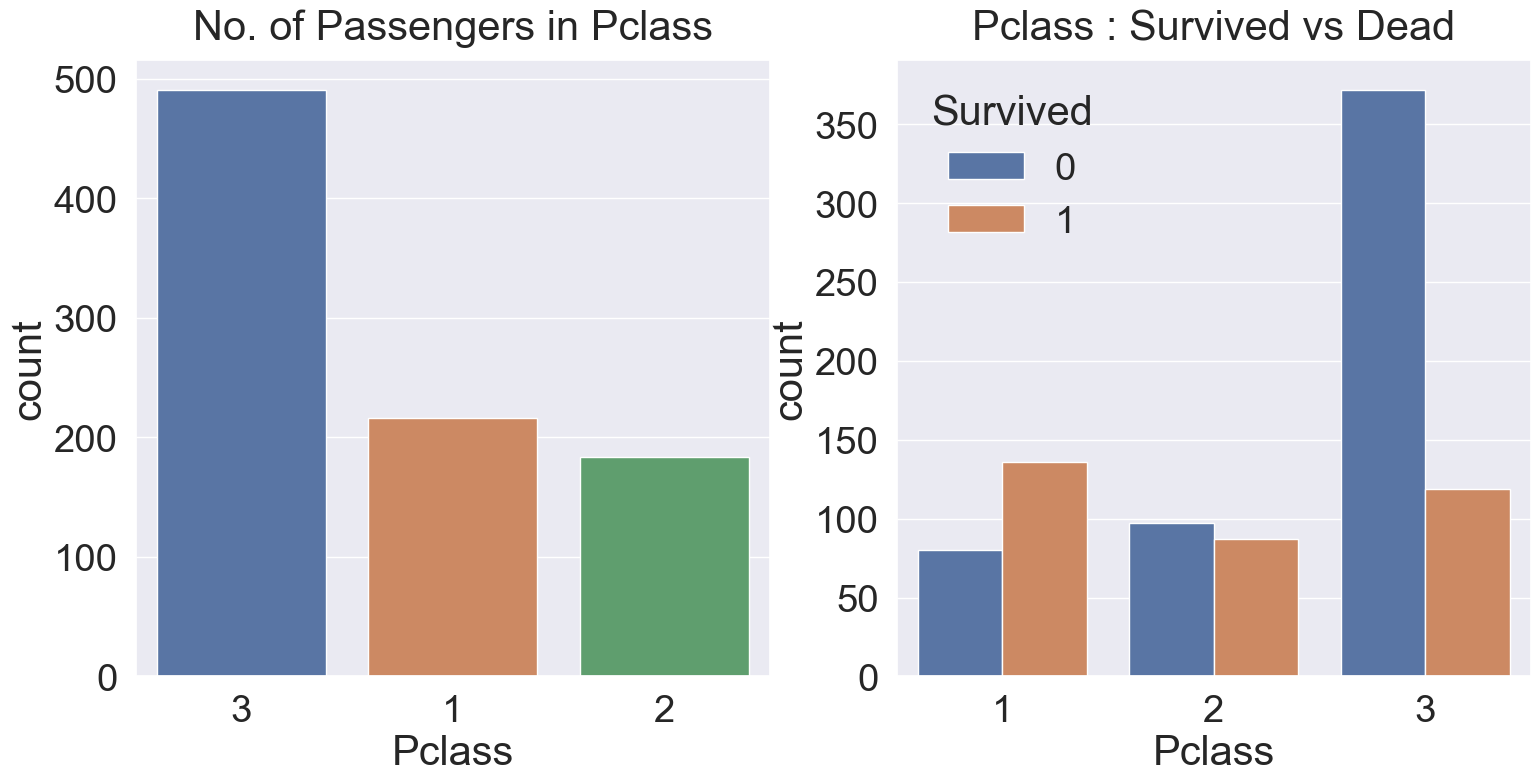

In [92]:
y_position = 1.02
f,ax = plt.subplots(1,2,figsize=(18,8))

sns.countplot(data=df_train,x='Pclass',ax=ax[0], order=[3,1,2]) # df_train['Pclass'].value_counts().index
ax[0].set_title('No. of Passengers in Pclass', y=y_position)
sns.countplot(data=df_train,x='Pclass',hue='Survived',ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)

plt.show()

Text(0.5, 1.0, 'Sex : Survived vs Dead')

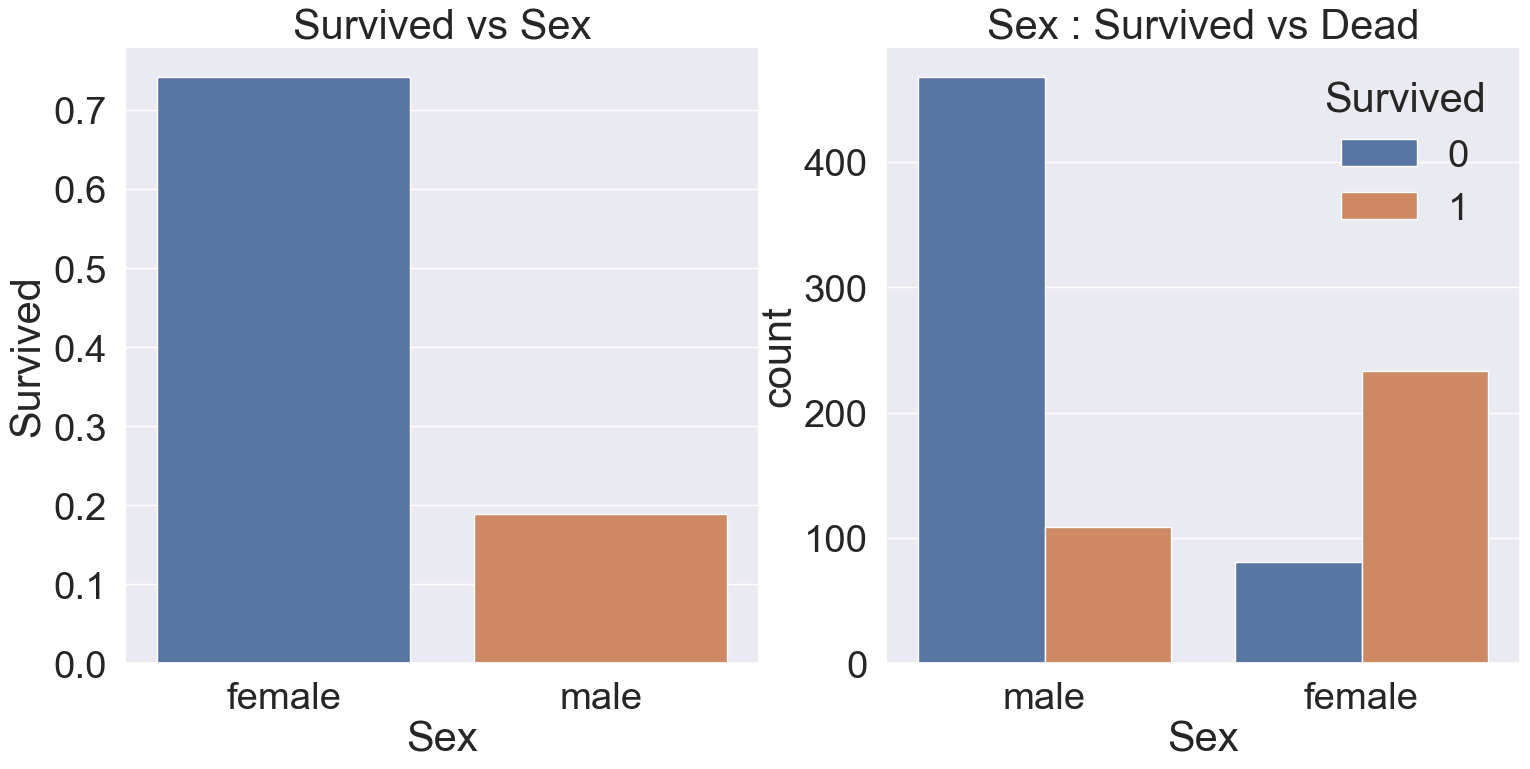

In [106]:
f,ax = plt.subplots(1,2,figsize=(18,8))
# sns.countplot(data=df_train,x='Sex',ax=ax[0])
sns.barplot(data = df_train[['Sex','Survived']].groupby(by='Sex',as_index=False).mean(), x='Sex',y='Survived',ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(data=df_train,x='Sex',hue='Survived',ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

In [110]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

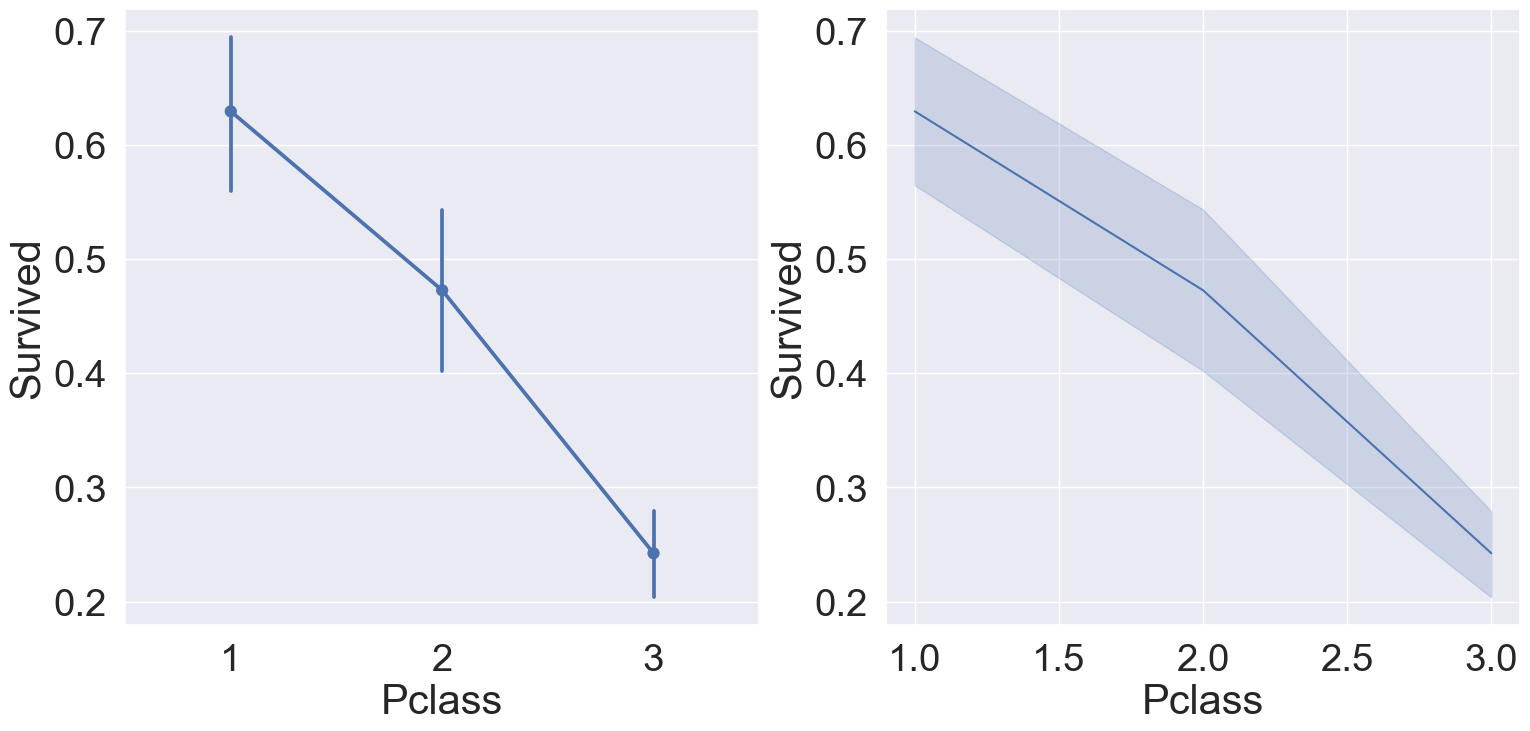

In [115]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.pointplot(data=df_train,x='Pclass',y='Survived', ax=ax[0])

sns.lineplot(data=df_train,x='Pclass',y='Survived', ax=ax[1])


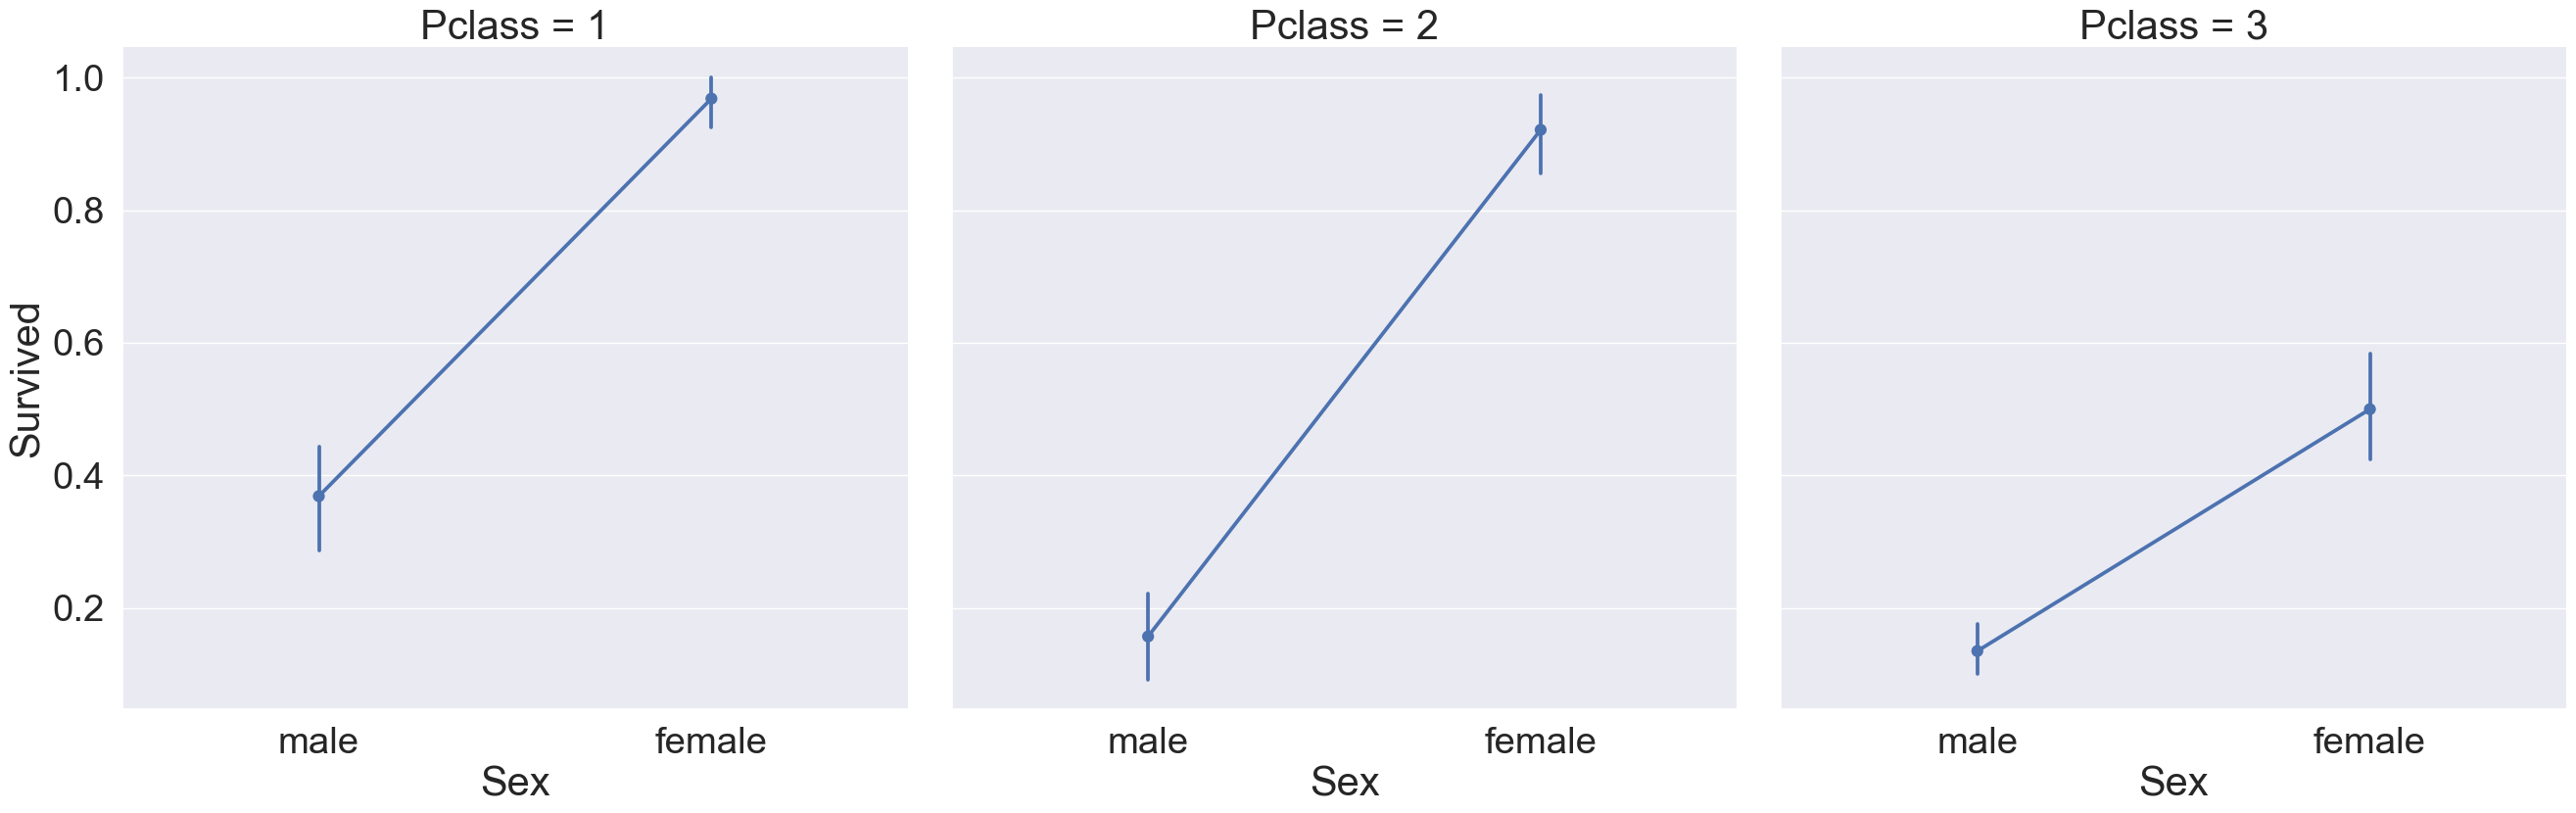

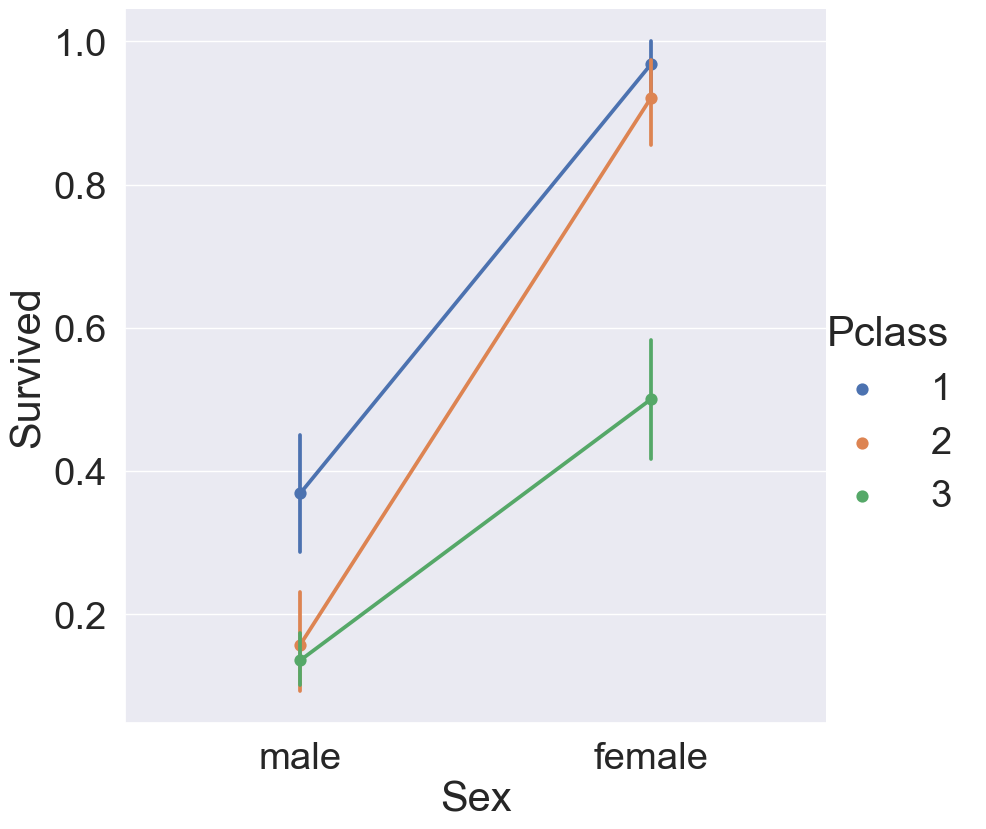

In [123]:
sns.factorplot(data=df_train,x='Sex',y='Survived',col='Pclass',size=9,ax=[0,1])
sns.factorplot(data=df_train,x='Sex',y='Survived',hue='Pclass',size=9,ax=[0,2])

In [133]:
print("최연장자 : {:>10.1f}세".format(df_train['Age'].max()))
print("평균연령 : {:>5.1f}세".format(df_train['Age'].mean()))
print("최연소자 : {:.1f}세".format(df_train['Age'].min()))

# 제일 나이 많은 탑승객 : 80.0 years

최연장자 :       80.0세
평균연령 :  29.7세
최연소자 : 0.4세


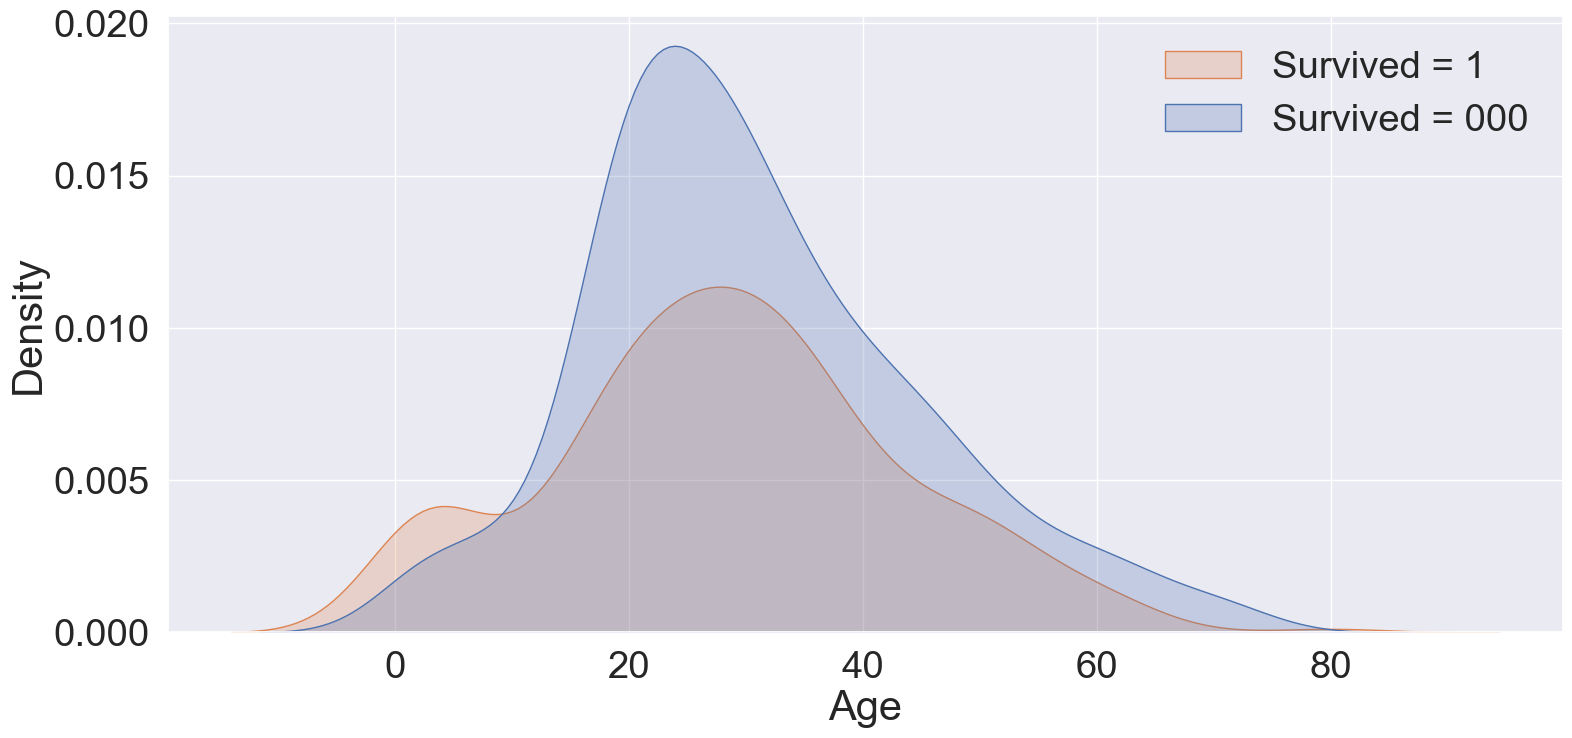

In [239]:
fig,ax = plt.subplots(1,1,figsize=(18,8))
sns.kdeplot(data=df_train, x='Age',hue='Survived',ax=ax, shade=True)
plt.legend(['Survived = 1','Survived = 000'])
plt.show()

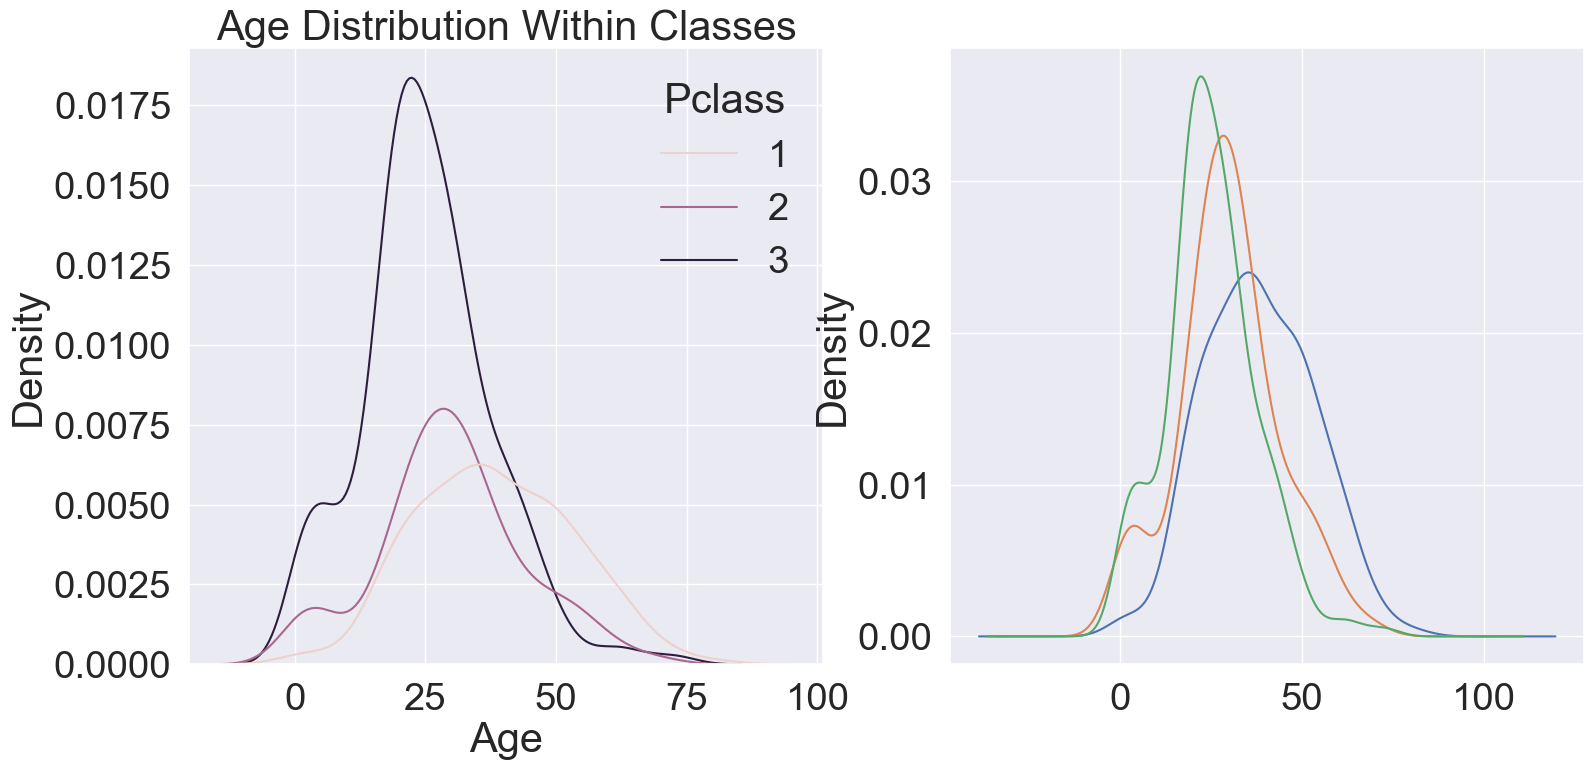

In [151]:
fig,ax = plt.subplots(1,2,figsize=(18,8))

sns.kdeplot(data=df_train, x='Age',hue='Pclass',ax=ax[0])
ax[0].set_title('Age Distribution Within Classes')

df_train[df_train['Pclass']==1]['Age'].plot(kind='kde',ax=ax[1])
df_train['Age'][df_train['Pclass']==2].plot(kind='kde',ax=ax[1])
df_train['Age'][df_train['Pclass']==3].plot(kind='kde',ax=ax[1])

plt.show()

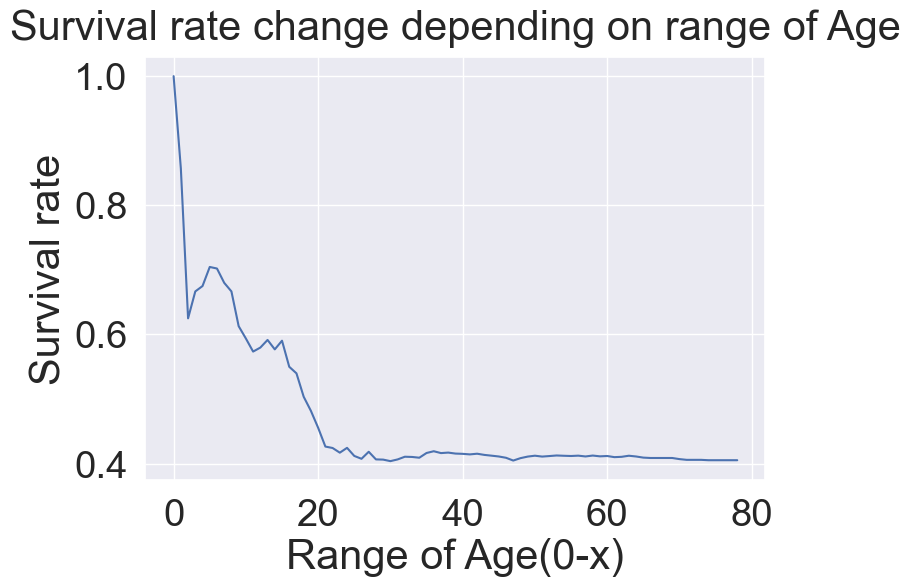

In [180]:
# 나이와 생존율은 유관한가?
# 1. 0~n세 까지의 나이와 생존률
# 2. 나이대별 생존률

######### 1 ##########
change_age_range_survival_ratio = []

for i in range(1,80) :
    d = df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived'])
    change_age_range_survival_ratio += [d]

plt.plot(change_age_range_survival_ratio)

plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

         Survived
Age_cat          
baby     0.680000
teen     0.454545
young    0.358896
adult    0.420495
old      0.227273


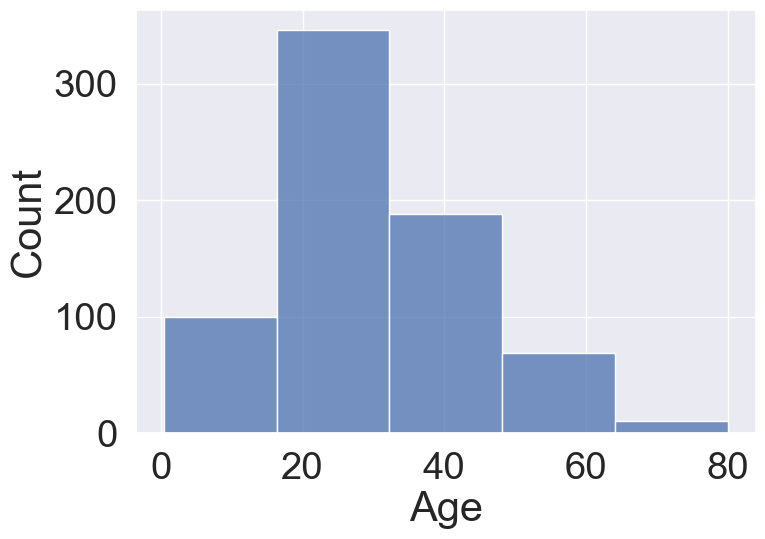

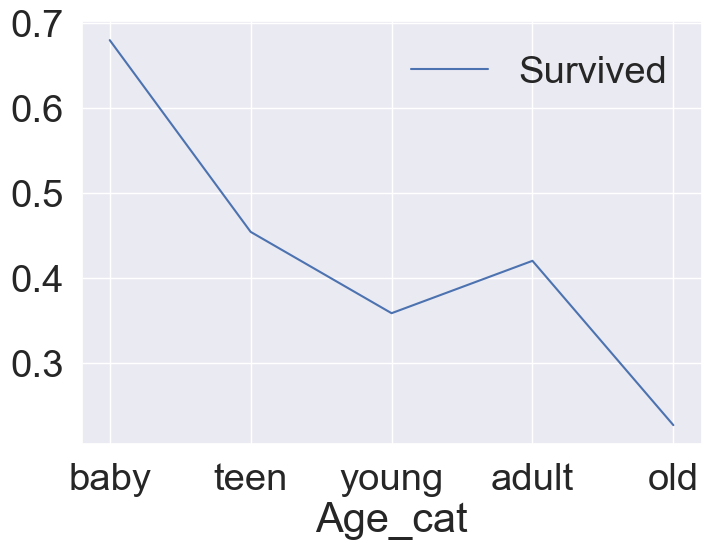

In [218]:
######### 2 ##########

sns.histplot(data=df_train, x='Age', bins=5)

df_titanic = df_train.copy()
df_titanic.head(5)
df_titanic['Age_cat'] = pd.cut(df_titanic['Age'], bins=[0, 7, 15, 30, 60, 100], labels = ['baby', 'teen', 'young', 'adult', 'old'])
df_titanic.head(5)
df_titanic[['Age_cat','Survived']].groupby(by='Age_cat').mean().plot()
print(df_titanic[['Age_cat','Survived']].groupby(by='Age_cat').mean())

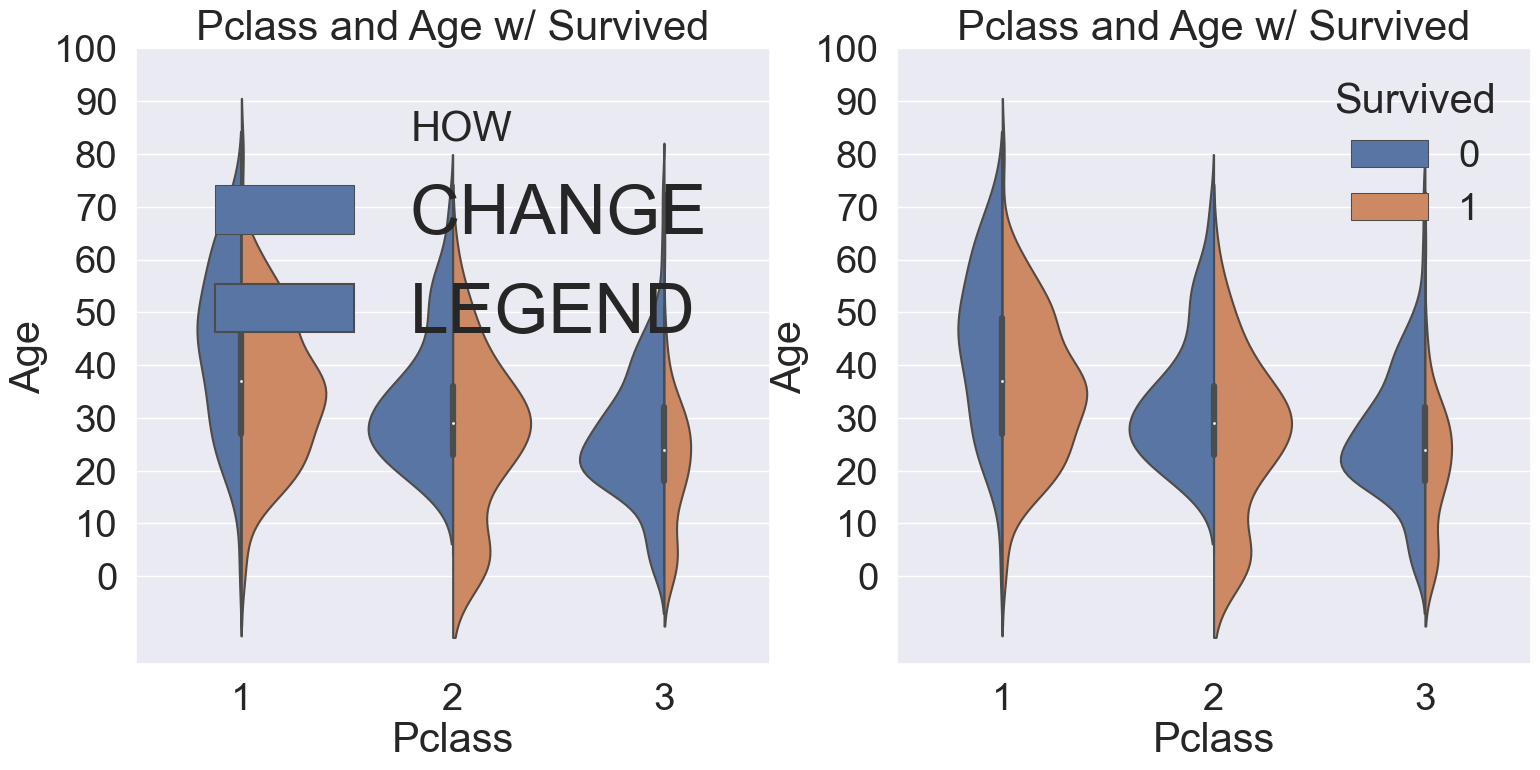

In [265]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived', ax=ax[0], scale='count', split=True)
ax[0].set_title('Pclass and Age w/ Survived')
ax[0].set_yticks(range(0,110,10))
ax[0].legend(['CHANGE','LEGEND'],title='HOW', fontsize=50)

sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived', ax=ax[1], scale='count', split=True)
ax[1].set_title('Pclass and Age w/ Survived')
ax[1].set_yticks(range(0,110,10))
# sns.violinplot(data=df_train, x='Sex', y='Age', hue='Survived', split=True, ax=ax[1], scale='count')
# ax[1].set_title('Sex and Age /w Survived')
# ax[1].set_yticks(range(0,110,10))
plt.show()

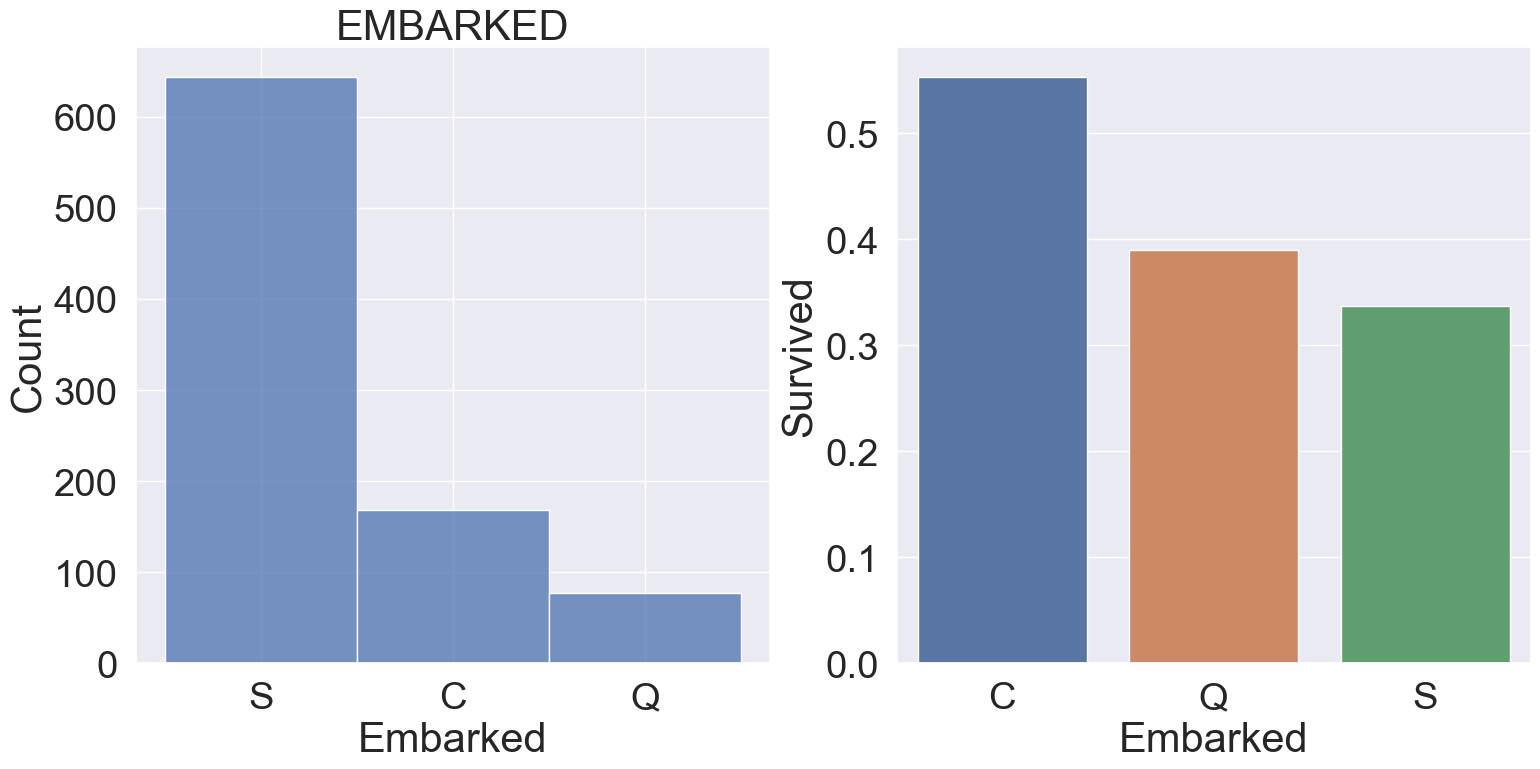

In [277]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.histplot(data=df_train[['Embarked','Survived']], x='Embarked',ax=ax[0])
ax[0].set_title('EMBARKED')
sns.barplot(data = df_train[['Embarked','Survived']].groupby(by='Embarked',as_index=False).mean(),x='Embarked',y='Survived',ax=ax[1])
plt.show()